<a href="https://colab.research.google.com/github/ManasviAtGitHub/Python-practice/blob/main/Statistics_for_Data_Science_3_Statistical_Experiments_and_Significance_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The classical statistical inference pipeline**

***Formulate hypothesis -> Design experiment -> Collect data -> Inference/conclusions***

**A/B Testing**

An A/B test is an experiment with two groups to establish which of two treatments, products, procedures or the like is superior.

**Treatment** : Something (drug, price, web headline) to which a subject is exposed.

**Treatment group**: A group of subjects exposed to a specific treatment.

**Control group** : A group subjects exposed to no (or standard) treatment.

**Randomization** : The process of randomly assigning subjects to treatments.

**Subjects** : The items (web visitors, patients, etc) that are exposed to treatments.

**Test statistic** : The metric used to measure the effect of the treatment.


**Hypothesis Tests** (Significance Tests)

**Null hypothesis** : the hypothesis that chance is to blame

**Alternative hypothesis** : Counterpoint to the null (what you hope to prove)

**One-way test** : Hypothesis test that counts chance results only in one direction.

**Two-way test** : Hypothesis test that counts chance results in two directions


Null Hypothesis is a logical construct embodying the notion that nothing special has happened, and any effect you observe is due to random chance.

The hypothesis test assumes that the null hypothesis is true, creates a "null model" (a probability model), and tests whether the effect you observe is a reasonable outcome of that model

**Resampling**

In statistics it means to repeatedly sample values from observed data, with a general goal of assessing random variablility in a statistic. In machine learning it can be used to assess and improve the accuracy of models. (Bagging and Random Forest).
It has two main types,
1.   Bootstap
2.   Permutation


**Permutation Test** : is the procedure of combining two or more samples together and randomly(or exhaustively) reallocating the observations to resamples. (also called Randomization test, random permutation test, exact test)

**Resampling** : Drawing additional samples from an observed data set.

**With or without replacement** : in sampling whether or not an item is returned to the sample before the next draw.





In [ ]:
%matplotlib inline

import random
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power
import matplotlib.pylab as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cd drive/MyDrive/Datasets_py

/content/drive/MyDrive/Datasets_py


In [ ]:
s_t = pd.read_csv("web_page_data.csv")
s_t.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [ ]:
s_t.Time = 100 * s_t.Time
s_t.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


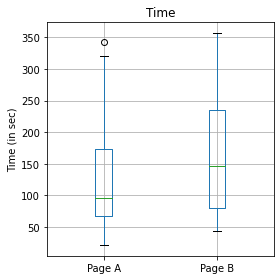

In [ ]:
ax = s_t.boxplot(by='Page', column='Time', figsize=(4,4))

ax.set_xlabel('')
ax.set_ylabel('Time (in sec)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [ ]:
mean_a = s_t[s_t.Page=="Page A"].Time.mean()
mean_b = s_t[s_t.Page=="Page B"].Time.mean()
print(mean_b-mean_a)

35.66666666666667


In [ ]:
def perm_fun(x, nA, nB):
  n = nA + nB
  iB = set(random.sample(range(n), nB))
  iA = set(range(n)) - iB
  return x.loc[list(iB)].mean() - x.loc[list(iA)].mean()

nA = s_t[s_t.Page == "Page A"].shape[0]
nB = s_t[s_t.Page == "Page B"].shape[0]

print(perm_fun(s_t.Time, nA, nB))

2.980952380952374


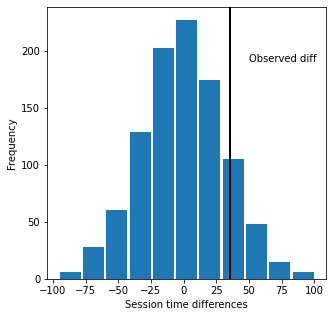

In [ ]:
random.seed(1)
perm_diffs = [perm_fun(s_t.Time, nA, nB) for _ in range(1000)]
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11,rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed diff')
ax.set_xlabel('Session time differences')
ax.set_ylabel('Frequency')
plt.show()


In [ ]:
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_b - mean_a))

0.121


**Statistical Significance and p-Values**

**p-value** : Given a chance model that embodies null hypothesis, the p-value is the probablility of obtaining results as unusual or extreme as the observed results.

**alpha** : The probability threshold of "unusualness" that chance results must surpass for actual outcomes to be deemed statistically significant.

**Type 1 error** : Mistakenly concluding an effect is real (when it is due to chance)

**Type 2 error** : Mistakenly concluding an effect is due to chance (when it is real).


Observed difference: 0.0368%


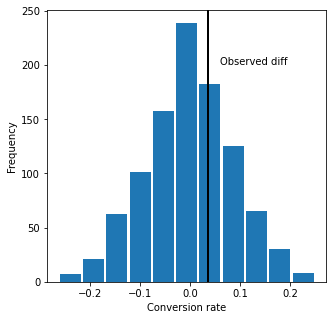

In [ ]:
random.seed(1)
obs_pct_diff = 100 * ((200 / 23739) - (182/22588))
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100*perm_fun(conversion, 23739, 22588) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11,rwidth=0.9)
ax.axvline(x = obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed diff')
ax.set_xlabel('Conversion rate')
ax.set_ylabel('Frequency')
plt.show()


In [ ]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.332


In [ ]:
survivors = np.array([[200, 23739-200], [182,22588-182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test : {p_value/2:.4f}')

p-value for single sided test : 0.3498
